In [11]:
import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('Customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
featureset = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
featureset['Gender']=featureset['Gender'].astype('category').cat.codes

C:\Users\Amin\AppData\Local\Temp\ipykernel_9836\1367243778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureset['Gender']=featureset['Gender'].astype('category').cat.codes


In [14]:
X = featureset.values
min_max_scaler = StandardScaler()
feature_mtx = min_max_scaler.fit_transform(X)

In [15]:
epsilon = 1
minimumSamples = 2
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(feature_mtx)
labels = db.labels_

In [16]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

Estimated number of clusters: 6
Estimated number of noise points: 2


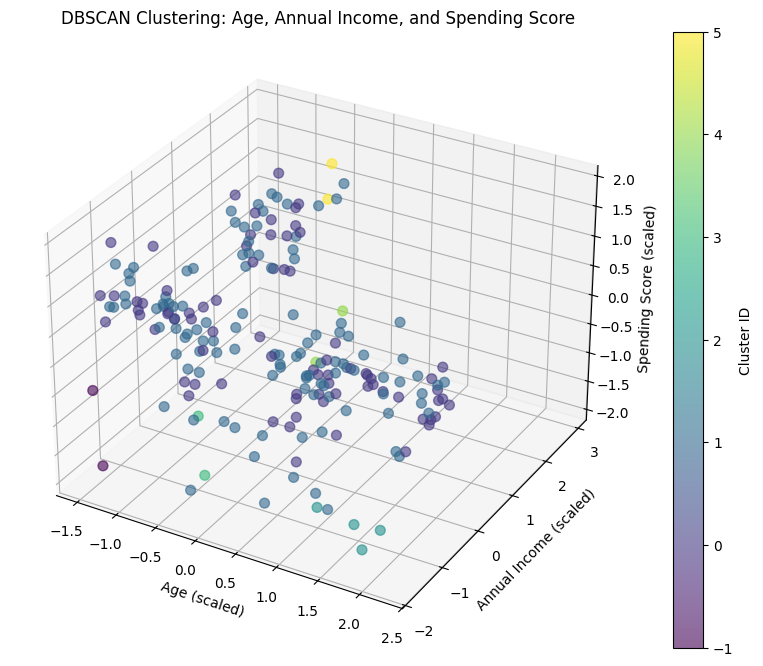

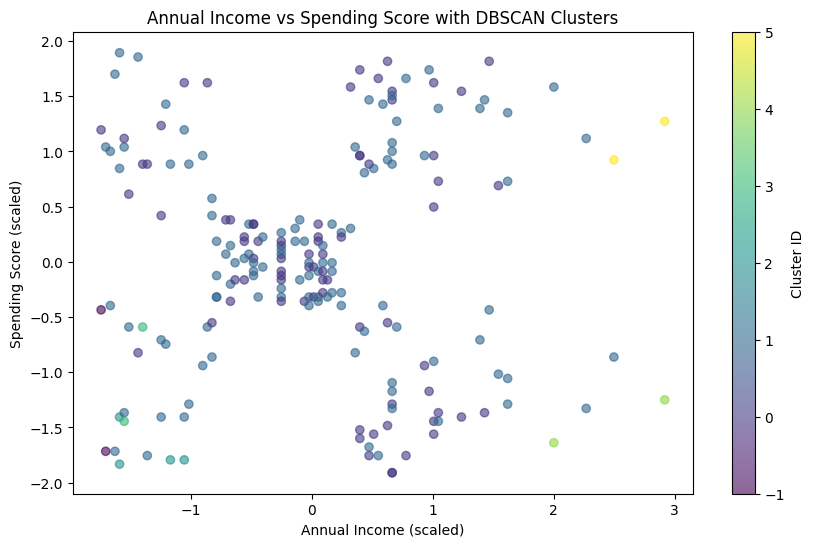

In [17]:
# Visualization: Diet vs Exercise vs Cognitive Score
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Get the indices of the features we want to plot
diet_idx = featureset.columns.get_loc('Age')
exercise_idx = featureset.columns.get_loc('Annual Income (k$)')
cognitive_idx = featureset.columns.get_loc('Spending Score (1-100)')

# Scatter plot
scatter = ax.scatter(feature_mtx[:, diet_idx], 
                     feature_mtx[:, exercise_idx], 
                     feature_mtx[:, cognitive_idx], 
                     c=labels, cmap='viridis', s=50, alpha=0.6)

ax.set_xlabel('Age (scaled)')
ax.set_ylabel('Annual Income (scaled)')
ax.set_zlabel('Spending Score (scaled)')
plt.title('DBSCAN Clustering: Age, Annual Income, and Spending Score')
plt.colorbar(scatter, label='Cluster ID')
plt.show()

# 2D Visualization: Exercise vs Cognitive Score
plt.figure(figsize=(10, 6))
plt.scatter(feature_mtx[:, exercise_idx], feature_mtx[:, cognitive_idx], 
            c=labels, cmap='viridis', alpha=0.6)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Annual Income vs Spending Score with DBSCAN Clusters')
plt.colorbar(label='Cluster ID')
plt.show()